In [27]:
%pip install librosa IPython matplotlib ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [15]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display

In [16]:
wave_x, sample_rate = librosa.load('sample_music/58bpm.wav')
ipd.Audio(wave_x, rate=sample_rate)

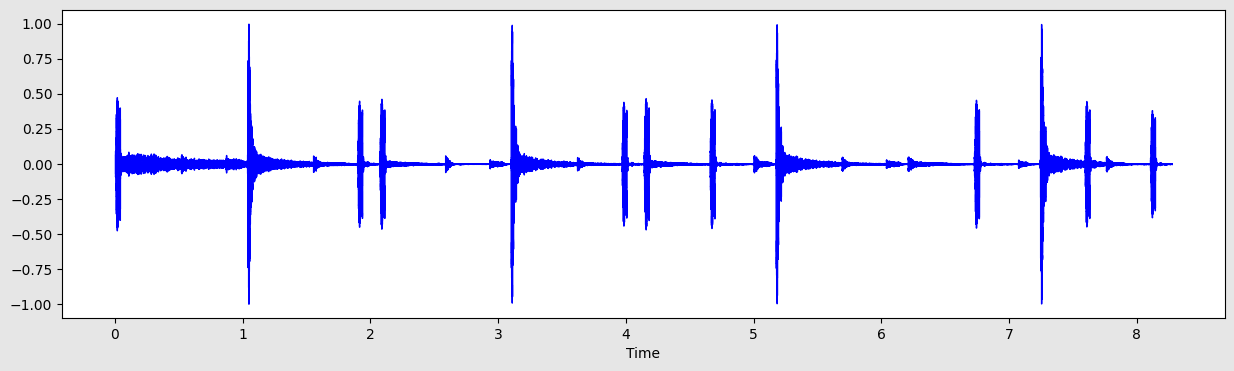

In [17]:
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(wave_x, sr=sample_rate, color='blue')

In [18]:
X = librosa.stft(wave_x)
Xdb = librosa.amplitude_to_db(abs(X))

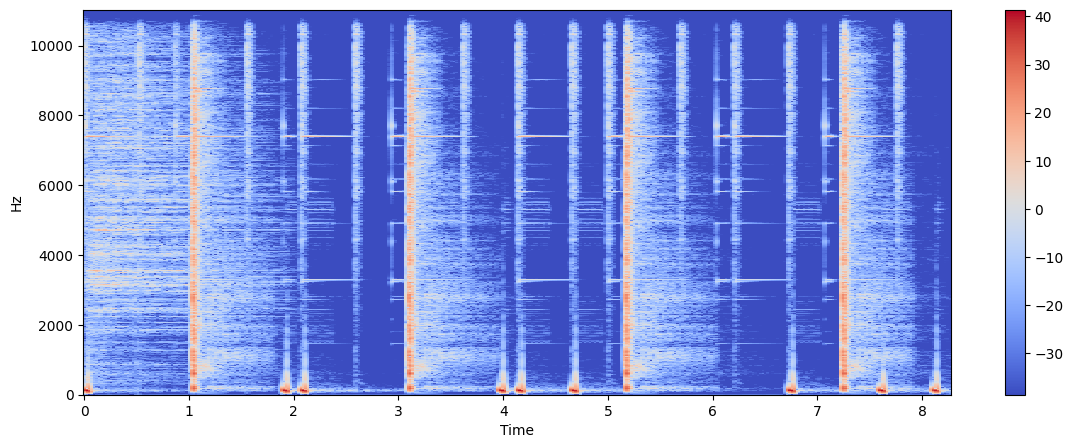

In [19]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [20]:
tempo, beat_frames = librosa.beat.beat_track(y=wave_x, sr=sample_rate)
print(f'Estimated tempo: {tempo} beats per minute')

Estimated tempo: 117.45383522727273 beats per minute


In [21]:
# Converts the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sample_rate)

In [22]:
print(beat_times)
print(beat_times.shape)

[0.55727891 1.06811791 1.60217687 2.11301587 2.62385488 3.11147392
 3.64553288 4.17959184 4.69043084 5.20126984 5.7353288  6.2461678
 6.7570068  7.2678458 ]
(14,)


(-1.0, 1.0)

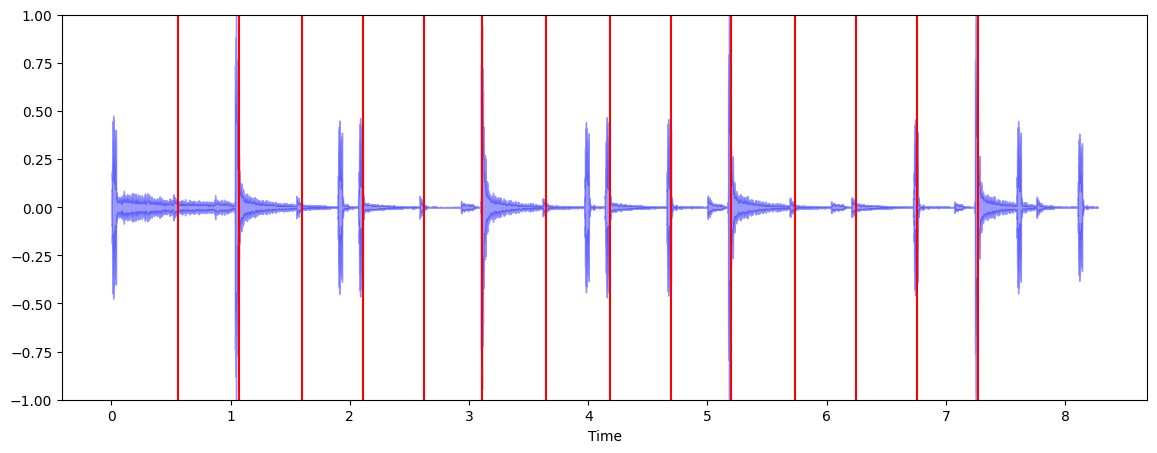

In [23]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(wave_x, color="blue", alpha=0.4)
plt.vlines(beat_times, -1, 1, color='red')
plt.ylim(-1, 1)